# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("irisdataset/iris.csv")



In [8]:
# (Q) how many data-points and features?
print (iris.shape)
iris.size

(150, 5)


750

In [7]:
#(Q) What are the column names in our dataset?
print (iris.columns)
iris.head()

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["variety"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

# (3.2) 2-D Scatter Plot

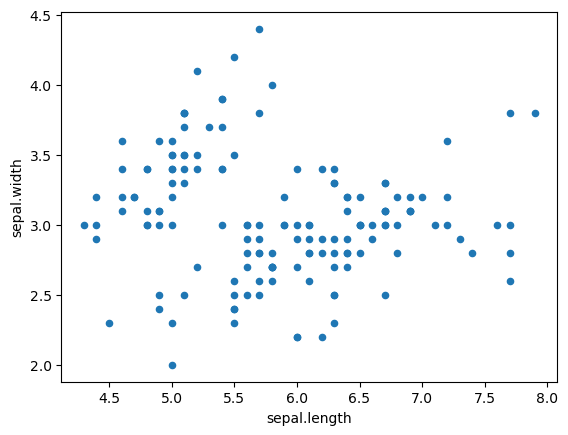

In [10]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal.length', y='sepal.width') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

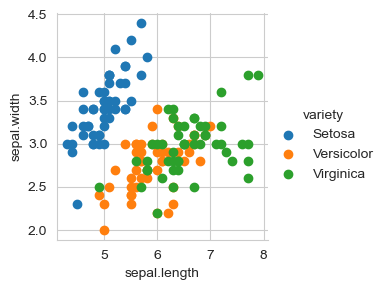

In [16]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="variety").map(plt.scatter, "sepal.length", "sepal.width").add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\p

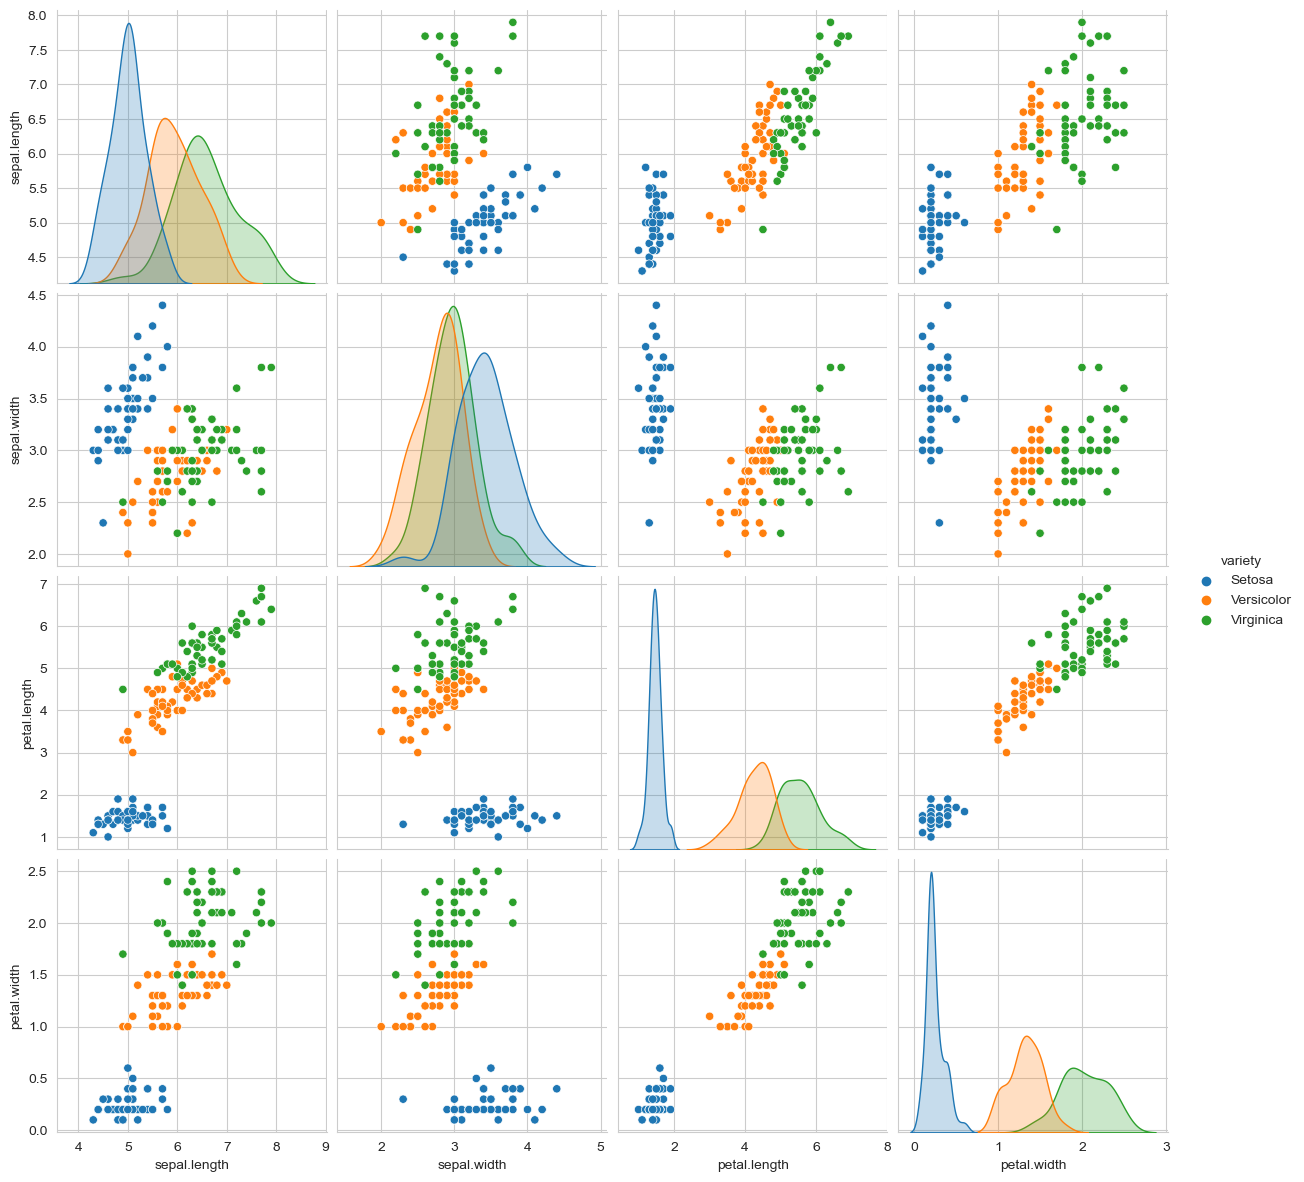

In [18]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="variety", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF

Series([], Name: petal.length, dtype: float64)


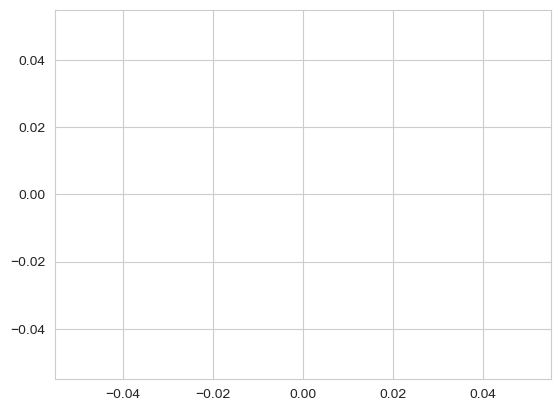

In [24]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["variety"] == "setosa"];
iris_virginica = iris.loc[iris["variety"] == "virginica"];
iris_versicolor = iris.loc[iris["variety"] == "versicolor"];
print(iris_setosa["petal.length"])
plt.plot(iris_setosa["petal.length"], np.zeros_like(iris_setosa['petal.length']), 'o')
plt.plot(iris_versicolor["petal.length"], np.zeros_like(iris_versicolor['petal.length']), 'o')
plt.plot(iris_virginica["petal.length"], np.zeros_like(iris_virginica['petal.length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

In [26]:
sns.FacetGrid(iris, hue="species", size=5).map(sns.distplot, "petal_length").add_legend();
plt.show();



TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

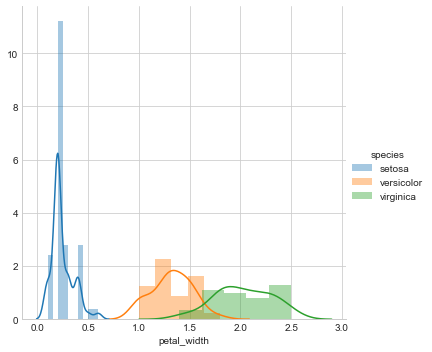

In [10]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

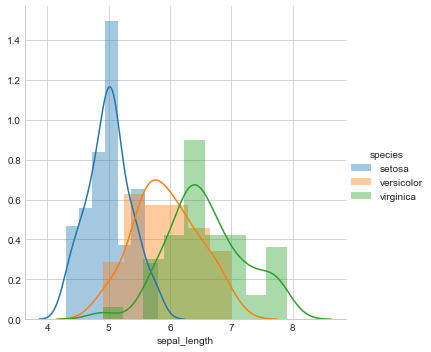

In [11]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

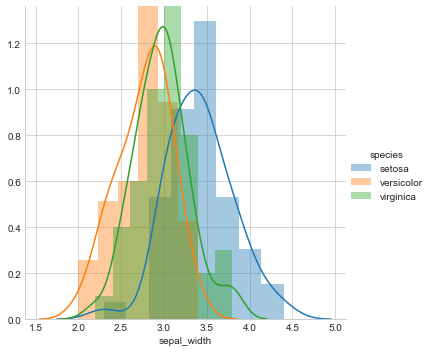

In [12]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

In [13]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


c:\Users\paish\anaconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


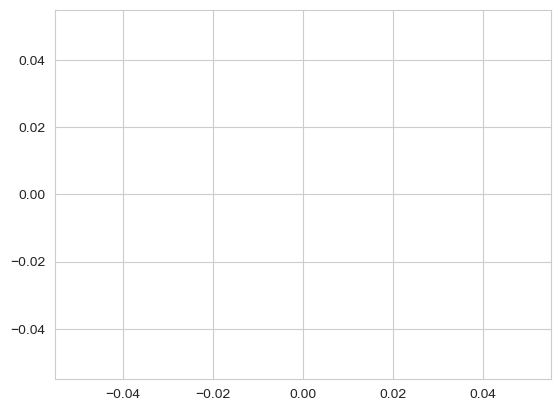

In [30]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

#computes CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[ 0.02  0.02  0.04  0.14  0.24  0.28  0.14  0.08  0.    0.04]
[ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]


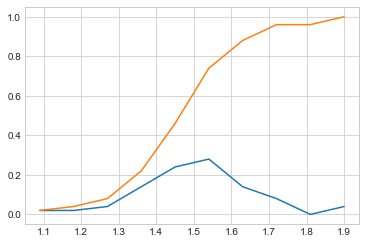

In [24]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[ 0.02  0.02  0.04  0.14  0.24  0.28  0.14  0.08  0.    0.04]
[ 1.    1.09  1.18  1.27  1.36  1.45  1.54  1.63  1.72  1.81  1.9 ]
[ 0.02  0.1   0.24  0.08  0.18  0.16  0.1   0.04  0.02  0.06]
[ 4.5   4.74  4.98  5.22  5.46  5.7   5.94  6.18  6.42  6.66  6.9 ]
[ 0.02  0.04  0.06  0.04  0.16  0.14  0.12  0.2   0.14  0.08]
[ 3.    3.21  3.42  3.63  3.84  4.05  4.26  4.47  4.68  4.89  5.1 ]


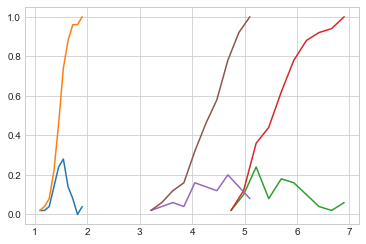

In [25]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

In [16]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))





Means:
1.464
2.41568627451
5.552
4.26

Std-dev:
0.171767284429
0.546347874527
0.465188133985


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [17]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[ 1.     1.4    1.5    1.575]
[ 4.5    5.1    5.55   5.875]
[ 3.    4.    4.35  4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.148260221851
0.667170998328
0.518910776477


# (3.7) Box plot and Whiskers

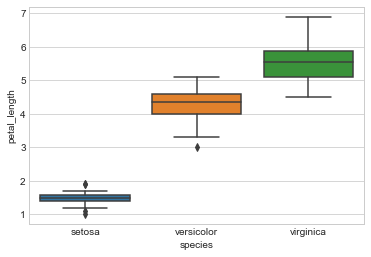

In [18]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# (3.8) Violin plots

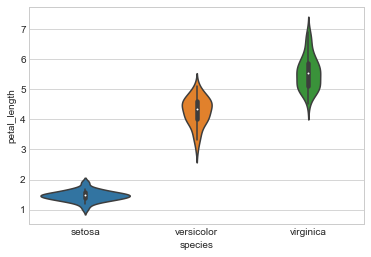

In [19]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# (3.9) Summarizing plots in english
* Exaplain your findings/conclusions in plain english
* Never forget your objective (the probelm you are solving) . Perform all of your EDA aligned with your objectives.

# (3.10) Univariate, bivariate and multivariate analysis.

In [20]:


Def: Univariate, Bivariate and Multivariate analysis.


SyntaxError: invalid syntax (<ipython-input-20-f25211abae88>, line 3)

# (3.11) Multivariate probability density, contour plot.


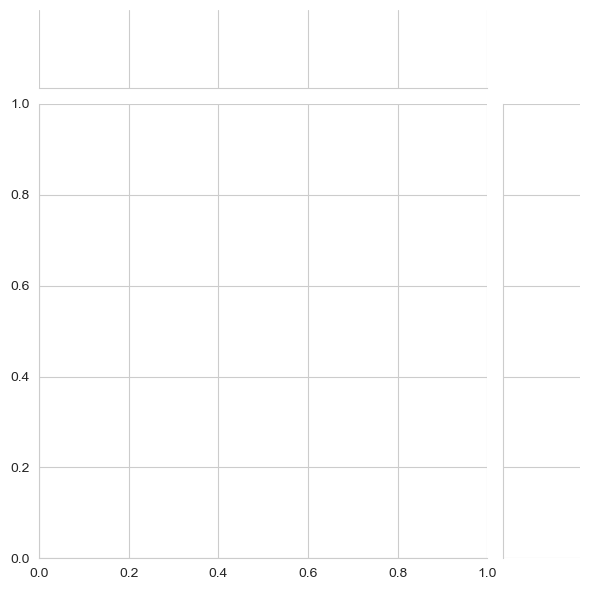

In [34]:
#2D Density plot, contors-plot
sns.jointplot(x="petal.length", y="petal.width", data=iris_setosa, kind="kde");
plt.show();


# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [37]:
# while reading csv file header is given none, so that it does not take header as first row in data
haberman = pd.read_csv('irisdataset/haberman.csv', header=None)
haberman.head()


,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [38]:
# note how many data points and features
haberman.shape

(306, 4)

In [39]:
#Add column names
column_names = ['Age', 'Year', 'positive_Auxilary_Nodes', 'Survival_Status']
haberman.columns = column_names
haberman.head()

,Age,Year,positive_Auxilary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

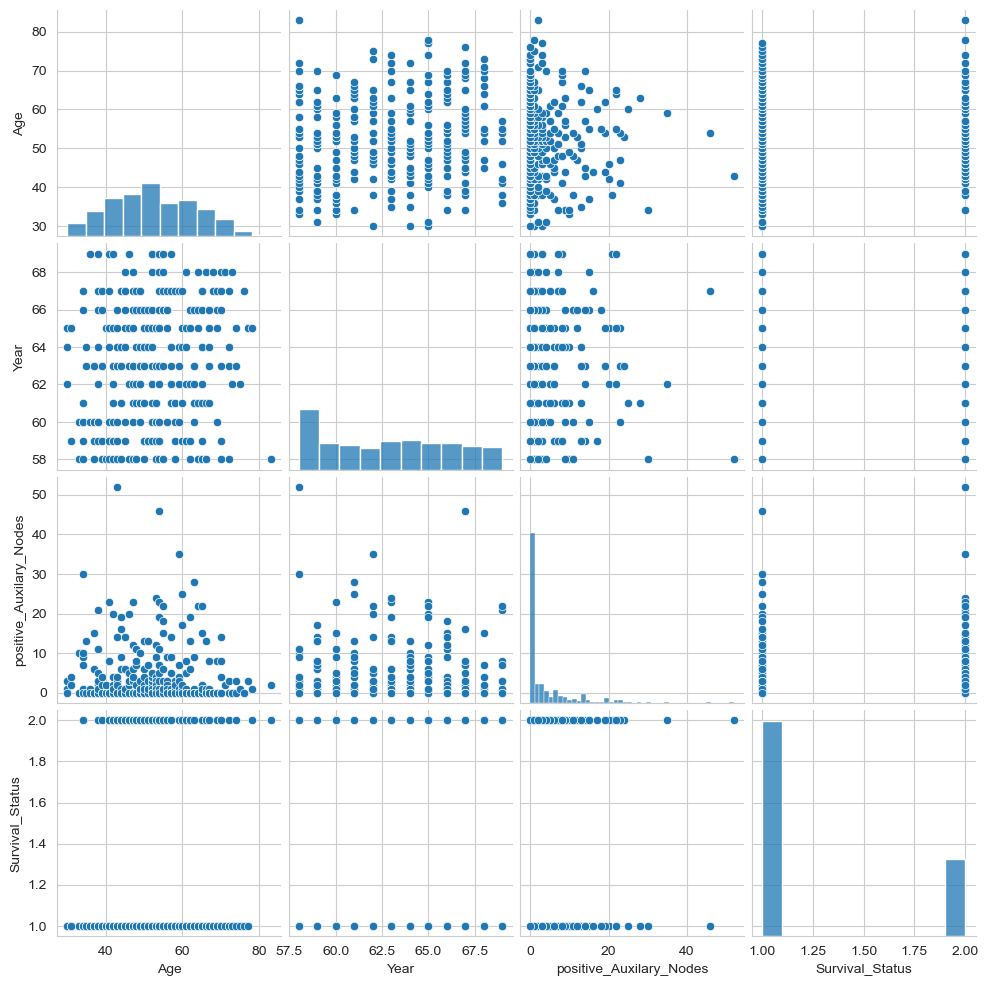

In [40]:
# now i want to see pair plots as the data have 3 features, im passing entire data to check for pairs in graph
sns.pairplot(haberman)

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


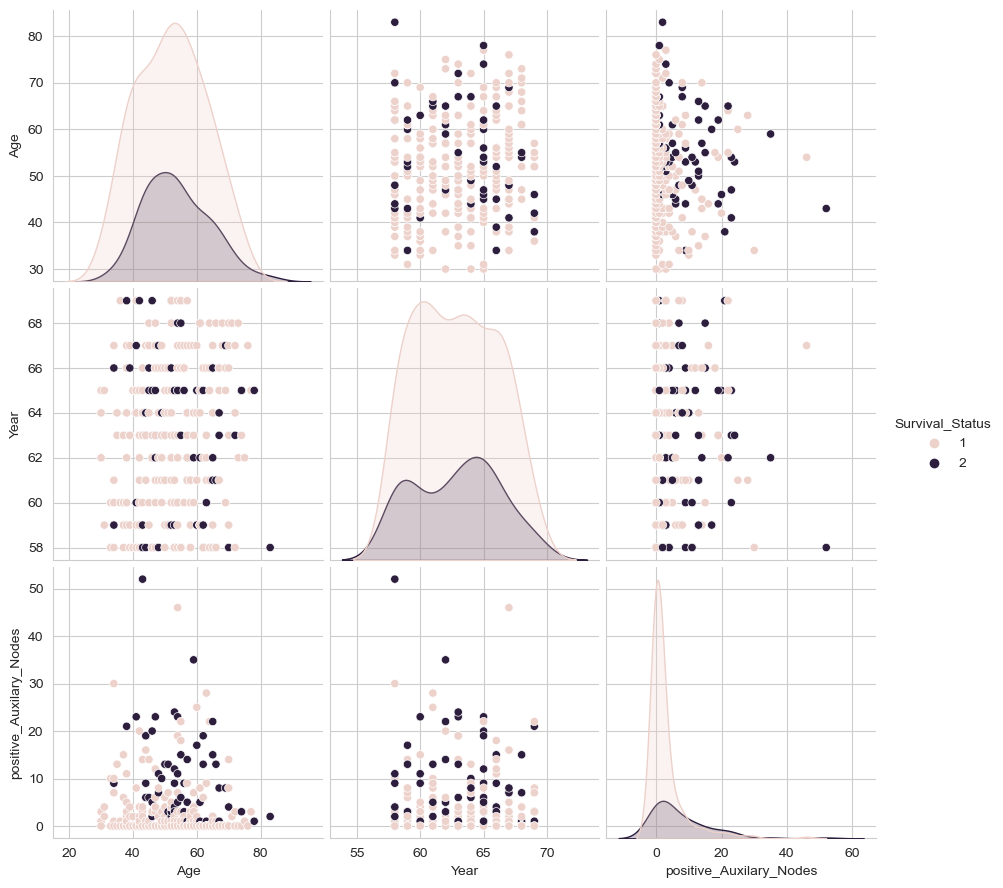

In [43]:
# plotting pairplot based on target column to recognize doifferent features in colors
#these are 1d features grouped into 2d in graph
sns.pairplot(haberman, hue='Survival_Status', size=3)

from above pair plot it is clear that survival status 1 and 2  class types are not seperable
try plotly to get 3d scatter plots to differentiate 3 types of features

In [54]:
import plotly.express as px

# Load the haberman dataset from plotly
df = pd.read_csv('irisdataset/haberman.csv', header=None, names = ['Age', 'Year', 'positive_Auxilary_Nodes', 'Survival_Status'])

# Create a 3D scatter plot
fig = px.scatter_3d(df, x='Age', y='Year', z='positive_Auxilary_Nodes', color='Survival_Status')

# Show the plot
fig.show()

Even Scatter plot of 3 features from plotly.express also did not give proper differentiation between classes for habermans dataset

In [55]:
#Now inspect the structure of the data
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      306 non-null    int64
 1   Year                     306 non-null    int64
 2   positive_Auxilary_Nodes  306 non-null    int64
 3   Survival_Status          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [62]:
# check for any null values and sum them if any to know the count
haberman. isnull().sum()

Age                        0
Year                       0
positive_Auxilary_Nodes    0
Survival_Status            0
dtype: int64

In [63]:
# now mapping feature to categorical..last column survival_status
#this prints the unique values of the class label
print(list(haberman['Survival_Status'].unique()))

[1, 2]


In [64]:
# modify the target column as meaning full values yes =1 and no = 0 and also type is changed to category for last column from int64
haberman['Survival_Status'] = haberman['Survival_Status'].map({1: "Yes", 2: "No"})
haberman['Survival_Status'] = haberman['Survival_Status'].astype('category')
haberman.head()


,Age,Year,positive_Auxilary_Nodes,Survival_Status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [65]:
#now type of survival status column datatype changed to category
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      306 non-null    int64   
 1   Year                     306 non-null    int64   
 2   positive_Auxilary_Nodes  306 non-null    int64   
 3   Survival_Status          306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [66]:
#Distribution of Classes in Data Set
# check how many datapoints for each class are present for survival_status column
haberman['Survival_Status'].value_counts()

Survival_Status
Yes    225
No      81
Name: count, dtype: int64

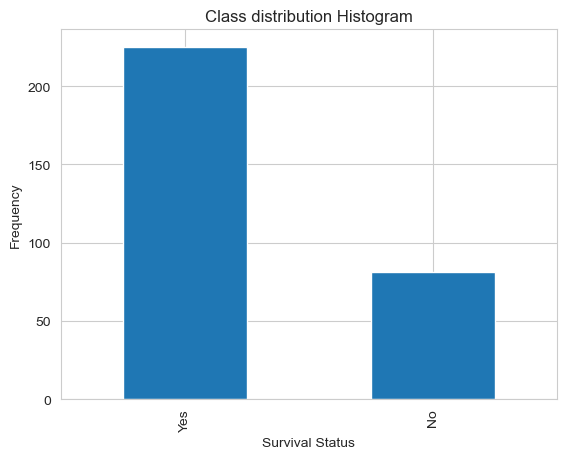

In [72]:
# Now plotting histograms for classes
#Binary classification - only two classes
count_classes = haberman['Survival_Status'].value_counts()
count_classes.plot(kind = 'bar')
plt.title("Class distribution Histogram")
plt.xlabel("Survival Status")
plt.ylabel("Frequency")
plt.show()

In [73]:
# to get the percentage of people survived and not survived 5 years or longer
haberman['Survival_Status'].value_counts(1)

Survival_Status
Yes    0.735294
No     0.264706
Name: proportion, dtype: float64

Above output shows that 74% people have survived 5 years or longer
and repaining 26 % people have survived less than 5 years
value_counts(1) gives the relative frequency of values in total values preent


In [74]:
# checking descriptive statics on data, since last column is categorical,by default it will  take only numberical  in the descriptive() method to calculate
haberman.describe()

,Age,Year,positive_Auxilary_Nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [75]:
# to include stastics of categorical column also in the describe method write as below
haberman.describe(include='all')

,Age,Year,positive_Auxilary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,Yes
freq,NaN,NaN,NaN,225
mean,52.457516,62.852941,4.026144,NaN
std,10.803452,3.249405,7.189654,NaN
min,30.000000,58.000000,0.000000,NaN
25%,44.000000,60.000000,0.000000,NaN
50%,52.000000,63.000000,1.000000,NaN
75%,60.750000,65.750000,4.000000,NaN


Now DataVisualization using Uni-variate Analysis


c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



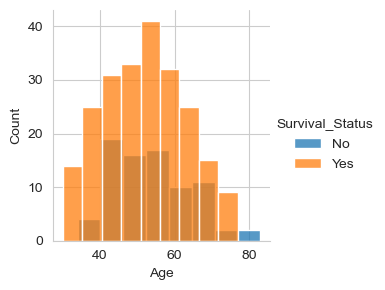

In [77]:
#univariate analysis - plotting distribution using histplot as distribution plots are depreciated
sns.FacetGrid(haberman, hue="Survival_Status").map(sns.histplot,"Age").add_legend()
plt.show();

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



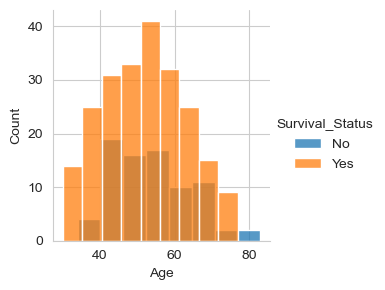

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



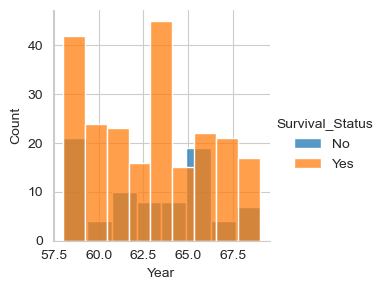

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



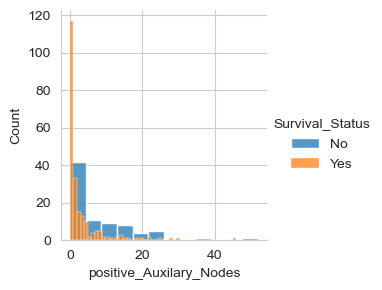

In [80]:
# plotting histplots for all features
for idx, features in enumerate(list(haberman.columns)[:-1]):
    fg = sns.FacetGrid(haberman, hue='Survival_Status')
    fg.map(sns.histplot, features).add_legend()
    plt.show()

PDF - probability density function and CDF - Cummulative distribution Function plots for all features

*****Age******
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
*****Year******
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
*****positive_Auxilary_Nodes******
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


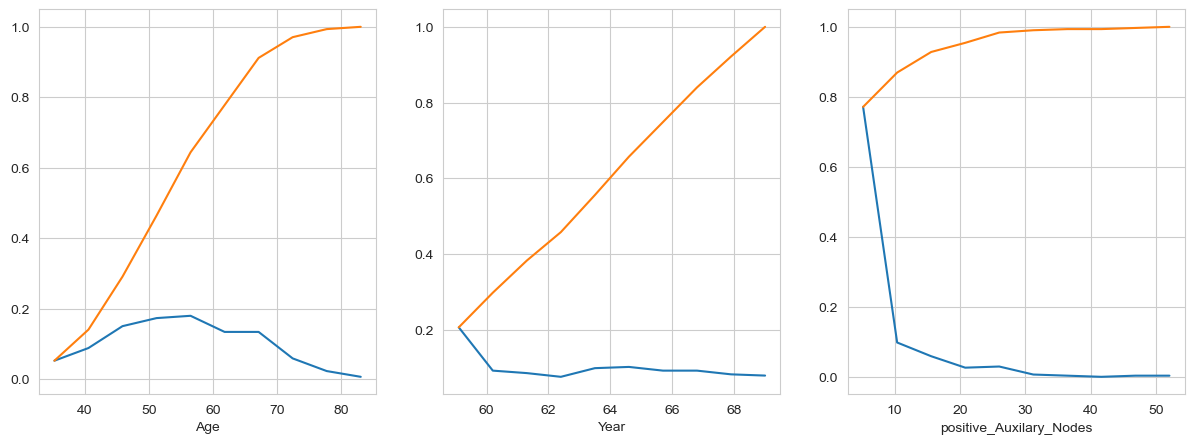

In [85]:
#CDF is a probability that the variable takes a value less than or equal to X
plt.figure(figsize=(20,5))

for idx, feature in enumerate(list(haberman.columns)[:-1]):
    plt.subplot(1, len(list(haberman.columns)), idx+1)
    print("*****"+feature+"******")

    counts, bin_edges  = np.histogram(haberman[feature], bins = 10, density = True)
    print("Bin Edges: {}".format(bin_edges))

    pdf = counts/sum(counts)
    print("PDF {}".format(pdf))

    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))

    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)



From above figure almost 80% of the positive auxilary nodes lies between 0 and 10
Now seperating dataset based on classslabel

In [86]:
survived = haberman[haberman['Survival_Status'] == 'Yes']
notsurvived = haberman[haberman['Survival_Status'] == 'No']

********* Age *********
Bin Edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
CDF: [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
Bin Edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
CDF: [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]
********* Year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
CDF: [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
Bin Edges: [58.  59.1 60.2 61.3 62.4 63

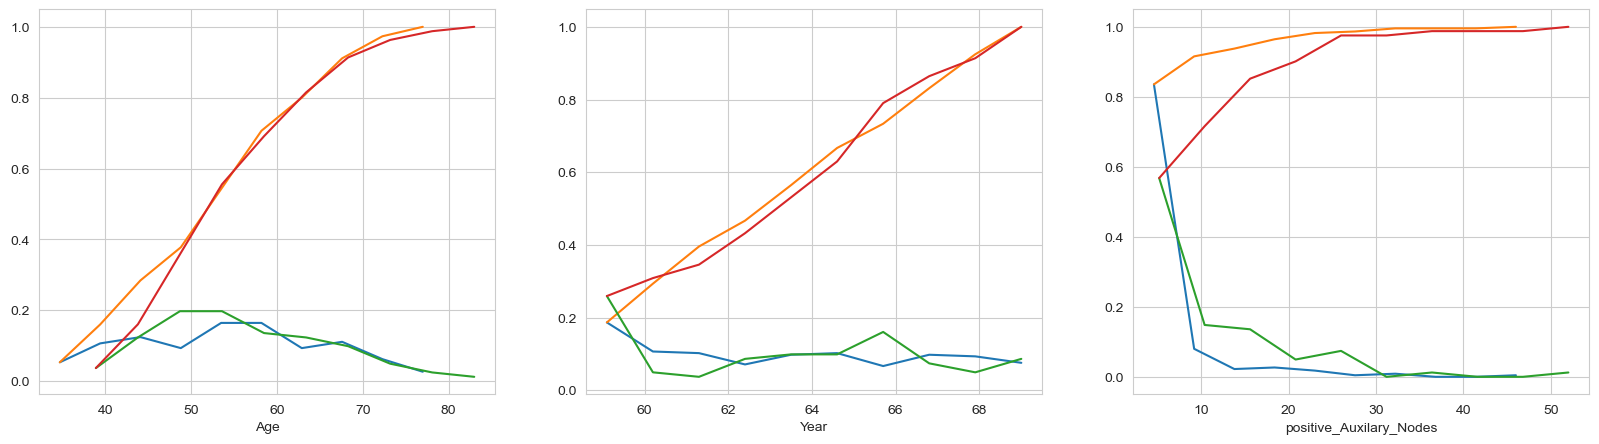

In [87]:
#ploting PDF and CDF based on class label type
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    
    # PDF & CDF for Survived class
    counts, bin_edges = np.histogram(survived[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    
    # PDF & CDF for not Survived class
    counts, bin_edges = np.histogram(notsurvived[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

From the above figure almost 80% of nodes are less than or equal to 5 positive auxilary nodes

Box Plots
they take less space and visually represent the 5 number summary of the data points in a box and the outliers are displayed as points outside of the box
Box plot typically detail the minimum value 25%(Q1) and median-50%(Q2)and 75% - Q3 and maximumvalue Q4
IQR interquartile range = Q3-Q1 = 75-25
Width of box plot has no significance, its in the length and margin values

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\paish\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



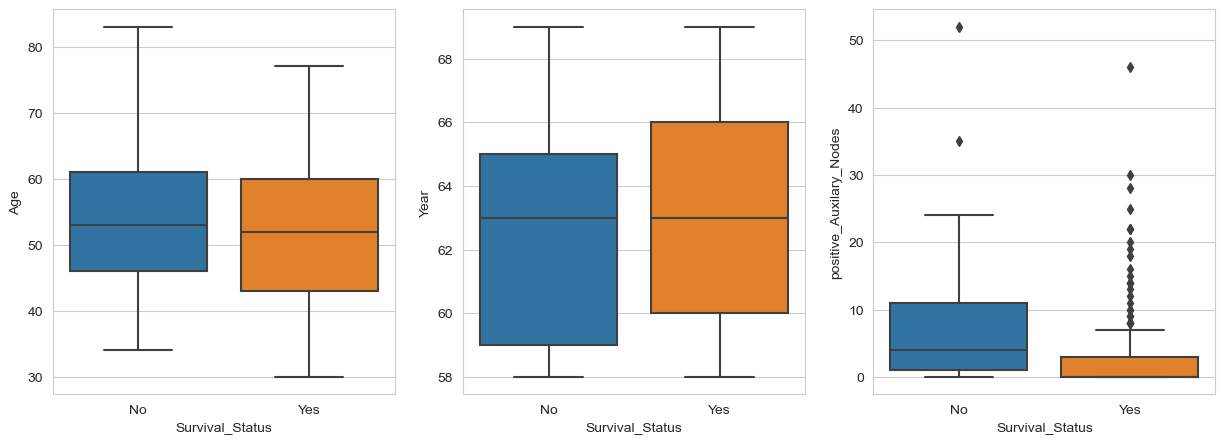

In [88]:
# box plot for all independent variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot( x='Survival_Status', y = feature, 
                 data=haberman, ax=axes[idx])
plt.show()

to know more refer to this article https://medium.com/@rndayala/eda-on-haberman-data-set-c9ee6d51ab0a
